Statistical Analysis

In [81]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
import numpy as np


load and clean data

In [46]:
main_data = pd.read_csv('../data/processed_data/austin_tx_processed.csv')

In [47]:
main_data = main_data.drop('PropertyId', axis=1)
# Ensure all data is numeric before calculating the correlation matrix
main_data = main_data.apply(pd.to_numeric, errors='ignore')
lower_cap = main_data['MaxRent'].quantile(0.00)
upper_cap = main_data['MaxRent'].quantile(0.995)
main_data['MaxRent'] = main_data['MaxRent'].clip(lower_cap, upper_cap)

/tmp/ipykernel_4173/104269111.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  main_data = main_data.apply(pd.to_numeric, errors='ignore')


General Statistics 

In [52]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): print(main_data.describe())


          Latitude    Longitude  ReviewScore  Neighborhood_Label      Leisure  \
count  9958.000000  9958.000000  9958.000000         9958.000000  9958.000000   
mean     30.330196   -97.740950     3.488723           63.034143     9.388331   
std       0.193333     0.078652     1.589830           41.220333     4.462934   
min      29.611740   -97.896440     0.000000            0.000000     0.000000   
25%      30.243182   -97.774229     3.700000           28.000000     6.000000   
50%      30.305514   -97.741573     4.000000           66.000000     9.000000   
75%      30.403713   -97.711702     4.400000          101.000000    12.000000   
max      33.052472   -96.033230     5.000000          136.000000    23.000000   

        Technology     Services     Location  Fitness & Wellness  \
count  9958.000000  9958.000000  9958.000000         9958.000000   
mean      6.379594     1.872264    11.343041            0.515264   
std       2.845369     1.202819     3.989795            0.809404  

distribution of rent prices 

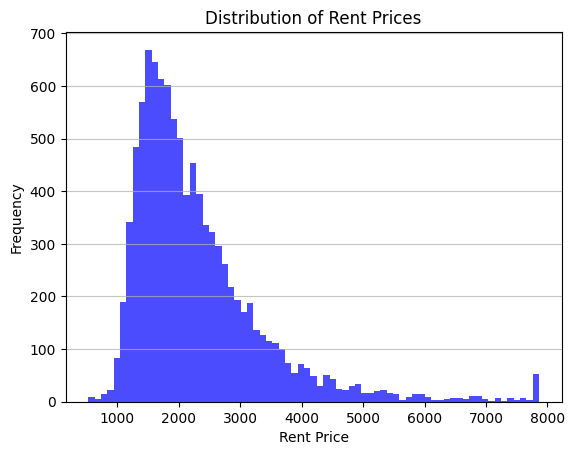

In [64]:

plt.hist(main_data['MaxRent'], bins='auto', color='blue', alpha=0.7)
plt.title('Distribution of Rent Prices')
plt.xlabel('Rent Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Linear Relationship between sqfoot and rent

Text(0.5, 1.0, 'Rent vs. Square Footage')

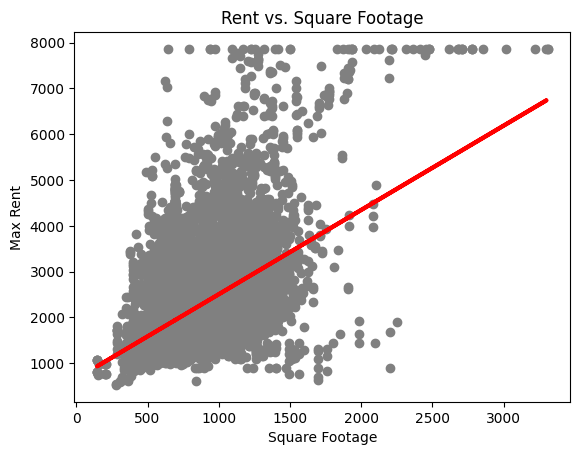

In [73]:
X = main_data[['SquareFootage']]
y = main_data['MaxRent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(main_data['SquareFootage'], main_data['MaxRent'], color='grey')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Predicted Rent')
plt.xlabel('Square Footage')
plt.ylabel('Max Rent')
plt.title('Rent vs. Square Footage')

Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

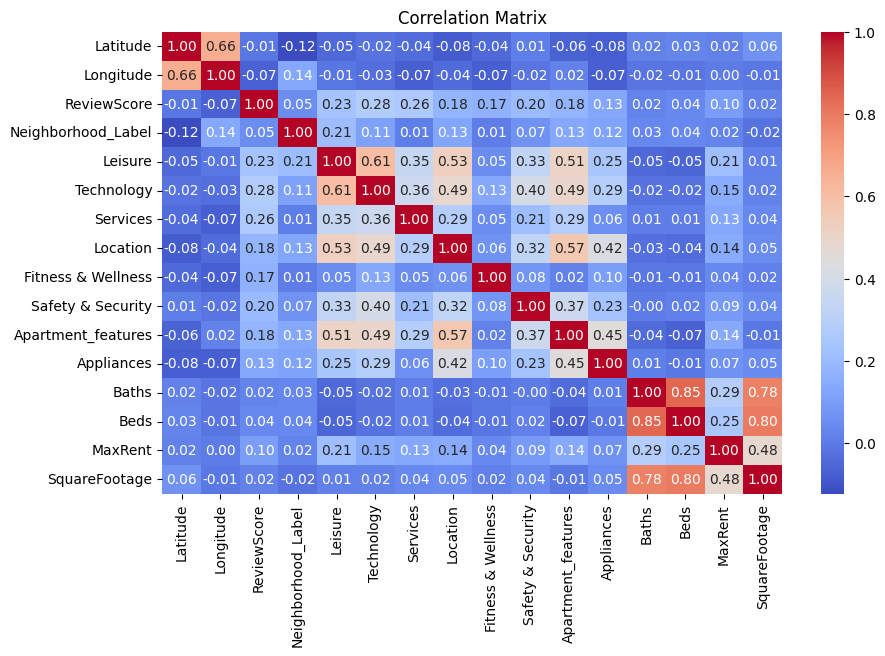

In [76]:
plt.figure(figsize=(10,6))
corr_matrix = main_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')


Visualizing Neighborhoods

In [80]:
neighborhoods = main_data.groupby('Neighborhood_Label').agg(
        MaxRent_Mean=('MaxRent', 'mean'),
        MaxRent_Std=('MaxRent', 'std'),
        Latitude_Mean=('Latitude', 'mean'),
        Longitude_Mean=('Longitude', 'mean')
        )
for index, row in neighborhoods.iterrows():
    print(f"Neighborhood: {index}")
    print(f"MaxRent Mean: {row['MaxRent_Mean']}, MaxRent Std: {row['MaxRent_Std']}")
    print(f"Latitude Mean: {row['Latitude_Mean']}, Longitude Mean: {row['Longitude_Mean']}")
    print() 

Neighborhood: 0
MaxRent Mean: 1895.344827586207, MaxRent Std: 633.7184072633787
Latitude Mean: 30.343062879310345, Longitude Mean: -97.74035941724138

Neighborhood: 1
MaxRent Mean: 1915.468085106383, MaxRent Std: 415.00345126502896
Latitude Mean: 30.464474344680852, Longitude Mean: -97.77615161462045

Neighborhood: 2
MaxRent Mean: 2237.48, MaxRent Std: 537.5865828441534
Latitude Mean: 30.42941632133333, Longitude Mean: -97.74735040415152

Neighborhood: 3
MaxRent Mean: 2133.742424242424, MaxRent Std: 552.679303475278
Latitude Mean: 30.39753841312676, Longitude Mean: -97.74732823163048

Neighborhood: 4
MaxRent Mean: 2398.3654585798818, MaxRent Std: 1226.9771549707204
Latitude Mean: 30.314121613261875, Longitude Mean: -97.76796471646456

Neighborhood: 5
MaxRent Mean: 2407.720987654321, MaxRent Std: 1056.8771009975023
Latitude Mean: 30.47010431135281, Longitude Mean: -97.77761449499496

Neighborhood: 6
MaxRent Mean: 2912.4545454545455, MaxRent Std: 479.8112453547032
Latitude Mean: 30.41075